# IMPORTANDO BIBLIOTECAS NECESSÁRIAS

In [59]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import metrics

In [60]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

In [89]:
def medidas(mod, predict_test_prob):
    predict_test_class = mod.predict(X_teste)
    matrix_conf = metrics.confusion_matrix(Y_teste, predict_test_class, labels = [1, 0])
    #Acuracia
    Acuracia = round(metrics.accuracy_score(Y_teste, predict_test_class),3)
    #Sensibilidade/ — TP/(TP + FN)
    Sensibilidade = round(matrix_conf[1,1]/(matrix_conf[1,1]+matrix_conf[1,0]),3)
    #Especificidade — TN/(TN + FP)
    Especificidade = round(matrix_conf[0,0]/(matrix_conf[0,0]+matrix_conf[0,1]),3)
    AUC = round(metrics.roc_auc_score(Y_teste, predict_test_prob),3)

    return(Acuracia,Sensibilidade,Especificidade, AUC)

In [90]:
# A base de dados está composto pelas variáveis:

# age = idade
# anaemia = se possui anemia
# creatinine_phosphokinase = nível da enzima CPK no sangue (mcg / L)
# diabetes = se possui diabetes
# ejection_fraction = porcentagem de sangue saindo do coração a cada contração (porcentagem)
# high_blood_pressure = se possui pressão alta
# platelets = plaquetas no sangue (quiloplacas / mL)
# serum_creatinine = nível de creatinina sérica no sangue (mg / dL)
# serum_sodium = nível de sódio sérico no sangue (mEq / L)
# sex = Sexo – 1: masculino e 0: feminino
# smoking = se é fumante
# DEATH_EVENT = se morreu

In [91]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv', encoding = "latin-1", sep = ';')

In [92]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# ANÁLISE DESCRITIVA 

In [93]:
# Não houve dados faltantes. A maior parte dos indivíduos não morreram, não tinham anemia, nem diabetes ou 
# pressão alta. A maioria dos indivíduos foi do sexo masculino e não fumava.

In [94]:
num_vivo = len(df[df['DEATH_EVENT'] == 0])
num_morto = len(df[df['DEATH_EVENT'] == 1])
print('Pessoas que permaneceram vidas: {0} ({1:2.2f}%)'.format(num_vivo, (num_vivo/ (num_vivo + num_morto)) * 100))
print('Pessoas que faleceram: {0} ({1:2.2f}%)'.format(num_morto, (num_morto/ (num_vivo + num_morto)) * 100))

Pessoas que permaneceram vidas: 203 (67.89%)
Pessoas que faleceram: 96 (32.11%)


In [95]:
df.drop(columns=['DEATH_EVENT']).describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000


In [96]:
# a média da idade foi de 60,83, com desvio padrão de 11,89;
# a média do o nível da enzima CPK no sangue foi de 581,84, com desvio padrão de 970,29;
# a média da porcentagem de sangue saindo do coração a cada contração foi de 38,08, com desvio padrão de 11,83;
# a média das plaquetas no sangue foi de 263358,03, com desvio padrão de 97804,24;
# a média do nível de creatinina sérica no sangue foi de 1,39, com desvio padrão de 1,03;
# a média do nível de sódio sérico no sangue foi de 136,63, com desvio padrão de 4,41.

# CORRELAÇÃO

In [97]:
# Houve correlação positiva e significativa entre se morreu e a variável nível de creatinina sérica no sangue e a variável idade.

# Houve correlação negativa e significativa entre se morreu e a variável nível de sódio sérico no sangue e a porcentagem de 
# sangue saindo do coração a cada contração.

In [98]:
df.corr(method = 'spearman')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.071924,-0.093078,-0.089657,0.074047,0.105740,-0.052091,0.270561,-0.101716,0.057791,0.030145,-0.197524,0.218125
anaemia,0.071924,1.000000,-0.216116,-0.012729,0.020366,0.038182,-0.035608,-0.016267,0.061405,-0.094769,-0.107290,-0.134652,0.066270
creatinine_phosphokinase,-0.093078,-0.216116,1.000000,0.042308,-0.067839,-0.080724,0.060033,-0.049936,0.016886,0.013298,-0.030351,0.125823,0.023616
diabetes,-0.089657,-0.012729,0.042308,1.000000,-0.011906,-0.012732,0.073829,0.001933,-0.055386,-0.157730,-0.147173,0.029501,-0.001943
ejection_fraction,0.074047,0.020366,-0.067839,-0.011906,1.000000,0.017943,0.053696,-0.177986,0.161695,-0.130792,-0.071748,0.070533,-0.286869
high_blood_pressure,0.105740,0.038182,-0.080724,-0.012732,0.017943,1.000000,0.069021,-0.089692,0.019281,-0.104615,-0.055711,-0.194794,0.079351
platelets,-0.052091,-0.035608,0.060033,0.073829,0.053696,0.069021,1.000000,-0.051028,0.049453,-0.137433,0.004774,-0.006927,-0.046200
serum_creatinine,0.270561,-0.016267,-0.049936,0.001933,-0.177986,-0.089692,-0.051028,1.000000,-0.300413,0.052184,-0.017048,-0.160990,0.370630
serum_sodium,-0.101716,0.061405,0.016886,-0.055386,0.161695,0.019281,0.049453,-0.300413,1.000000,-0.077084,0.008335,0.086393,-0.209837
sex,0.057791,-0.094769,0.013298,-0.157730,-0.130792,-0.104615,-0.137433,0.052184,-0.077084,1.000000,0.445892,-0.017332,-0.004316


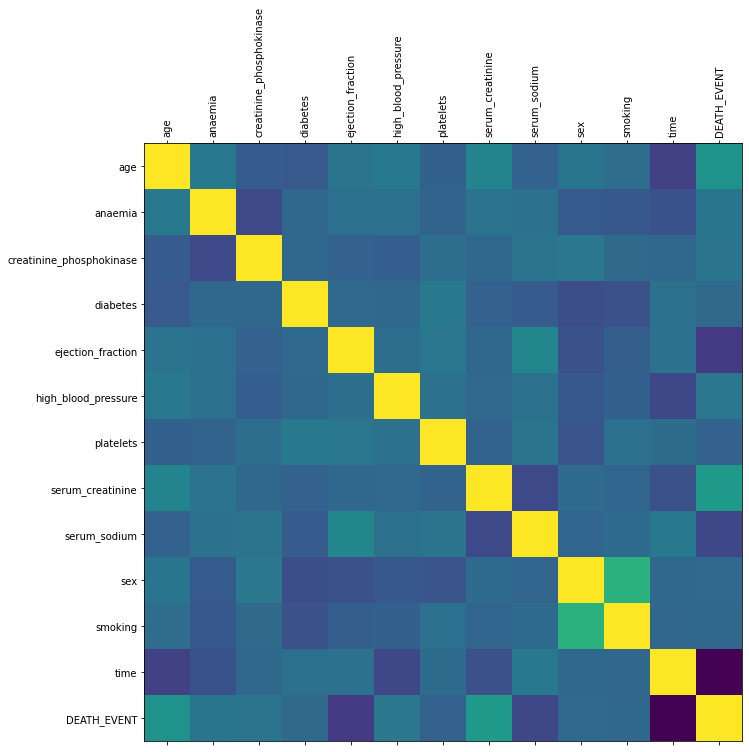

In [99]:
plot_corr(df)

# MÉTODO HOLDOUT

In [100]:
# O método holdout é usado para validação de dados, nele se divide o banco de dados entre treino e teste, sendo que o banco 
# treino é utilizado para treinar os modelos e o banco teste é usado para cálculo de medidas de desempenho dos modelos. 
# Aqui foi usado 70% dos dados para treino e 30% para teste.

# Não há preditores com variância zero e nem combinações lineares no banco de dados treino e teste.

In [101]:
from sklearn.model_selection import train_test_split

#Criando objetos

X = df.drop(columns=['DEATH_EVENT']).values

Y = df.DEATH_EVENT.values

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.30, random_state = 123)
X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape

((209, 12), (90, 12), (209,), (90,))

# REGRESSÃO LOGÍSTICA

In [102]:
from sklearn.linear_model import LogisticRegression

mod_reg1 = LogisticRegression(max_iter = 1000)
mod_reg1 = mod_reg1.fit(X_treino, Y_treino)

predict_reg_prob = mod_reg1.predict_proba(X_teste)
predict_reg_prob = predict_reg_prob[:, 1] # manter somente para a classe positiva

medidas_reg = np.array(medidas(mod_reg1, predict_reg_prob))

print(np.exp(mod_reg1.coef_))

[[1.04952149 1.00005382 1.00008056 1.00008819 0.9317888  1.00013306
  0.99999771 1.00587178 1.01237873 0.99933132 0.99942209 0.97716071]]


# RANDOM FOREST

In [103]:
from sklearn.ensemble import RandomForestClassifier

mod_rf = RandomForestClassifier(random_state = 123)
mod_rf = mod_rf.fit(X_treino, Y_treino.ravel())

predict_rf_prob = mod_rf.predict_proba(X_teste)
predict_rf_prob = predict_rf_prob[:, 1]

medidas_rf = np.array(medidas(mod_rf, predict_rf_prob))

# SVM (SUPPORT VECTOR MACHINE)

In [104]:
from sklearn import svm
from sklearn import calibration

mod_svm = svm.SVC(kernel='linear')
mod_svm = mod_svm.fit(X_treino, Y_treino.ravel())

predict_svm_prob = mod_svm.decision_function(X_teste)
medidas_svm = np.array(medidas(mod_svm, predict_svm_prob))

# MEDIDAS

In [105]:
pd.DataFrame({'Regressão' : medidas_reg,'RandomForest': medidas_rf,'SVM' : medidas_svm},
index = ['Acurácia', 'Sensibilidade', 'Especificidade', 'AUC'])

,Regressão,RandomForest,SVM
Acurácia,0.756,0.789,0.744
Sensibilidade,0.925,0.943,0.943
Especificidade,0.514,0.568,0.459
AUC,0.847,0.923,0.821


 # CURVA ROC

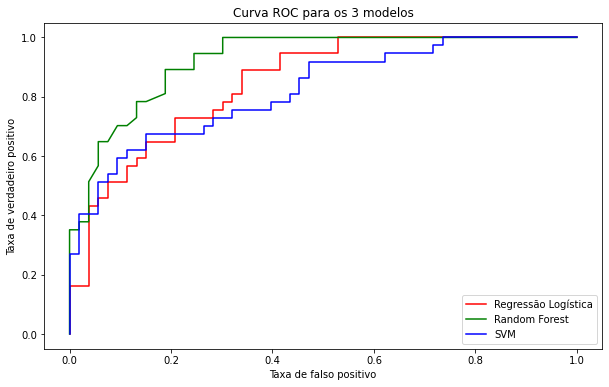

In [106]:
plt.figure(figsize = (10,6))
fpr_reg, tpr_reg, limite1 = metrics.roc_curve(Y_teste, predict_reg_prob)
fpr_rf, tpr_rf, limite2 = metrics.roc_curve(Y_teste, predict_rf_prob)
fpr_svm, tpr_svm, limite3 = metrics.roc_curve(Y_teste, predict_svm_prob)
plt.plot(fpr_reg, tpr_reg, color='red', label='Regressão Logística')
plt.plot(fpr_rf, tpr_rf, color='green', label='Random Forest')
plt.plot(fpr_svm, tpr_svm, color='blue', label='SVM')
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC para os 3 modelos')
plt.legend()
plt.show()